In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


# EDA

## 1. 결측값 처리
- `isnull()` : 결측값 확인, Boolean
- `fillna(N)` : 결측값 N으로 채우기

In [4]:
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [5]:
test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [6]:
train = train.fillna(0)

## 2. 시각화

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DebtRatio'>

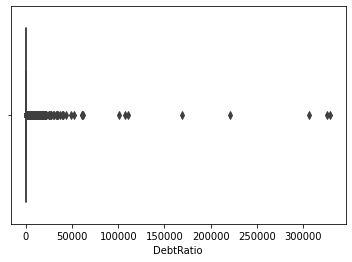

In [8]:
sns.boxplot(train['DebtRatio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

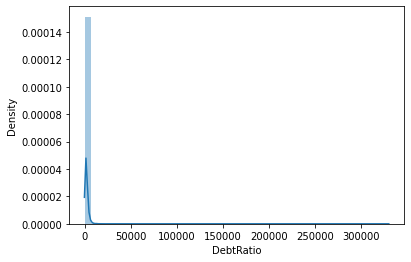

In [9]:
sns.distplot(train['DebtRatio'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

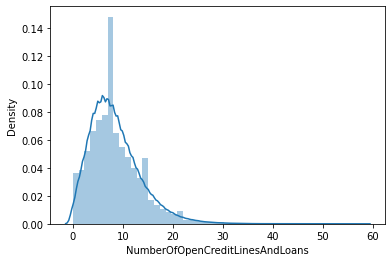

In [10]:
sns.distplot(train['NumberOfOpenCreditLinesAndLoans'])


In [11]:
train.isnull().sum()
train2 = train.fillna(0)
train2.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [12]:
test2 = test.drop(columns = 'SeriousDlqin2yrs')
test2 = test2.fillna(0)
test2

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,0.081596,70,0,836.000000,0.0,3,0,0,0,0.0
101501,101502,0.335457,56,0,3568.000000,0.0,8,0,2,1,3.0


In [13]:
train2 = train.drop(columns = 'SeriousDlqin2yrs')
train2

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149998,149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


# Model Training

In [14]:
# from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [15]:
# rf = RandomForestRegressor(n_jobs = -1)
# rf.fit(train2, train['SeriousDlqin2yrs'])

In [16]:
model = XGBRegressor()
model.fit(train2, train['SeriousDlqin2yrs'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [17]:
result = model.predict(test2)
result

array([0.10932878, 0.17353718, 0.02998856, ..., 0.00482298, 0.1384973 ,
       0.03304397], dtype=float32)

In [18]:
test['SeriousDlqin2yrs'] = result
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.109329,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.173537,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.029989,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.078885,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,0.095690,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,0.052391,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,0.472723,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,0.004823,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,0.138497,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [19]:
sub = pd.read_csv('../input/GiveMeSomeCredit/sampleEntry.csv')
sub

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [20]:
sub['Probability'] = result
sub

,Id,Probability
0,1,0.109329
1,2,0.173537
2,3,0.029989
3,4,0.078885
4,5,0.095690
...,...,...
101498,101499,0.052391
101499,101500,0.472723
101500,101501,0.004823
101501,101502,0.138497


In [21]:
sub['Probability'].sort_values()[:30]

35247   -0.308824
3035    -0.191322
236     -0.168064
6559    -0.152411
19787   -0.143298
52462   -0.140537
75945   -0.125992
6589    -0.119074
1360    -0.115852
20503   -0.111997
18915   -0.108519
1097    -0.105580
6043    -0.105354
17193   -0.103967
29080   -0.102219
6595    -0.101890
63844   -0.100507
16744   -0.100293
6284    -0.099449
21128   -0.099411
23306   -0.096303
9386    -0.091503
41323   -0.090775
27414   -0.090649
66257   -0.089899
49247   -0.086730
1005    -0.086380
40772   -0.083640
11583   -0.081604
45861   -0.080577
Name: Probability, dtype: float32

In [22]:
sub[sub['Probability'] < 0] = 0 
sub[sub['Probability'] > 1] = 1
sub['Id'] = sub.index +1

In [23]:
sub['Probability'].sort_values()[:30] 

50751    0.0
83064    0.0
65654    0.0
76499    0.0
55368    0.0
38895    0.0
28712    0.0
83056    0.0
8347     0.0
8343     0.0
28740    0.0
8338     0.0
89602    0.0
83044    0.0
65608    0.0
8317     0.0
65607    0.0
28754    0.0
96358    0.0
76537    0.0
38849    0.0
28763    0.0
38848    0.0
38847    0.0
18915    0.0
65591    0.0
55467    0.0
28779    0.0
65657    0.0
55470    0.0
Name: Probability, dtype: float32

In [24]:
sub

,Id,Probability
0,1,0.109329
1,2,0.173537
2,3,0.029989
3,4,0.078885
4,5,0.095690
...,...,...
101498,101499,0.052391
101499,101500,0.472723
101500,101501,0.004823
101501,101502,0.138497


In [25]:
sub.to_csv('sub2.csv', index = False)